# **Trying to find the best HyperParamters**

In [1]:
from Q_learning import Q_Learning
import numpy as np
import matplotlib.pyplot as plt
from RL_utils import find_path, calculate_rewards, path_in_grids, average_R_display, steps_plot, plot_Q_changing

In [2]:
q_learning = Q_Learning()
q_learning.max_episodes = 10000
q_learning.rewards={'r_time':-0.5,'r_pond':-5,'r_croissant':30,'r_cogs':20,'r_work':20}
q_learning.tubes=[[(0, 0), (1, 5)], [(1, 2), (4, 1)]]
q_learning.epsilon_decays={'epsilon_threshold': 0.5, 'epsilon_decay1': 0.9999, 'epsilon_decay2': 0.999}

In [3]:
alpha_list = [0.9, 0.6, 0.3, 0.1]
gamma_list = [0.9, 0.7, 0.5, 0.2]
R_alpha_list = []
R_gamma_list = []
colors= ['r', 'b', 'g', 'y', 'c']

In [4]:
%%time
for alpha in alpha_list:
    a_hist, Q_hist, Rtot = q_learning.learn(alpha,0.9,0.9)
    #print(Rtot)
    R_alpha_list.append(Rtot)

CPU times: user 2min 48s, sys: 5.59 s, total: 2min 53s
Wall time: 2min 48s


In [5]:
%%time
for gamma in gamma_list:
    a_hist, Q_hist, Rtot = q_learning.learn(0.9,gamma,0.9)
    #print(Rtot)
    R_gamma_list.append(Rtot)

CPU times: user 2min 51s, sys: 5.34 s, total: 2min 56s
Wall time: 2min 51s


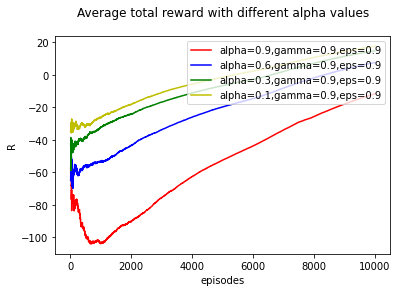

In [6]:
for i in range(len(alpha_list)):
    Rtot = R_alpha_list[i]
    Rtot_avg = Rtot.cumsum() / np.arange(1, len(Rtot) + 1)
    plt.plot(np.arange(20, len(Rtot_avg)), Rtot_avg[20:], colors[i], label=f'alpha={alpha_list[i]},gamma=0.9,eps=0.9')
    plt.legend(loc="upper right")
    
plt.xlabel('episodes')
plt.ylabel('R')
plt.title('Average total reward with different alpha values', fontsize=12, pad=20)
plt.show()

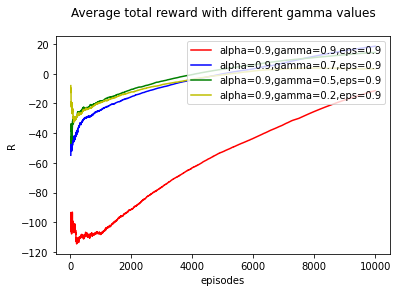

In [7]:
for i in range(len(gamma_list)):
    Rtot = R_gamma_list[i]
    Rtot_avg = Rtot.cumsum() / np.arange(1, len(Rtot) + 1)
    plt.plot(np.arange(20, len(Rtot_avg)), Rtot_avg[20:], colors[i], label=f'alpha=0.9,gamma={gamma_list[i]},eps=0.9')
    plt.legend(loc="upper right")


plt.xlabel('episodes')
plt.ylabel('R')    
plt.title('Average total reward with different gamma values', fontsize=12, pad=20)
plt.show()

In [9]:
%%time
alpha = 0.8
gamma = 0.9
epsilon = 0.7
q_learning.max_episodes = 50000
a_hist, Q_hist, Rtot = q_learning.learn(alpha,gamma,epsilon)

CPU times: user 53.4 s, sys: 2.04 s, total: 55.4 s
Wall time: 52.6 s


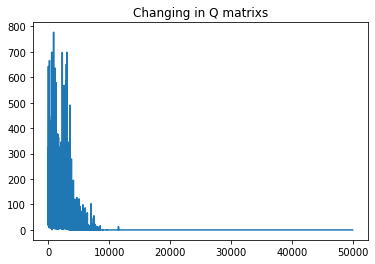

In [10]:
plot_Q_changing(Q_hist, absolute=True)

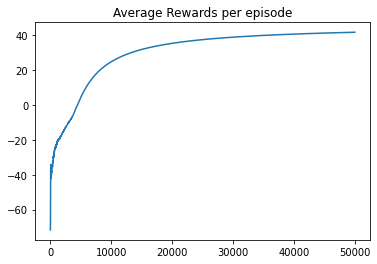

In [11]:
average_R_display(Rtot)

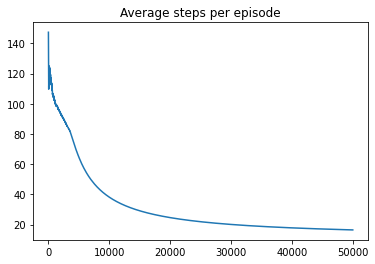

In [12]:
steps_plot(a_hist)

In [13]:
path = find_path(Q_hist[-1])
r, steps = calculate_rewards(q_learning.R, path)
print("Path: ",path)
print("Path in grid coords: ", path_in_grids(path, q_learning.dims))
print("Total Rewards: ", r)
print("Number of steps: ",steps)

Path:  [6, 0, 11, 10, 9, 15, 21, 22, 23, 29, 35]
Path in grid coords:  [(1, 0), (0, 0), (1, 5), (1, 4), (1, 3), (2, 3), (3, 3), (3, 4), (3, 5), (4, 5), (5, 5)]
Total Rewards:  46.0
Number of steps:  10
